Hello again, welcome to Week 3! For the first two weeks we did a bit of foundational python, but starting this week we will be getting more into artificial intelligence (AI) and machine learning (ML).

First, let's look at the big picture.

With the increase in data there is a greater demand for understanding and utilizing that data. Obviously ML and AI are used frequently in technology based companies, but their usage is rapidly spreading across industries.

Note however that the two are distinct, while being related. AI aims to mimic human intelligence, for instance as it relates to reasoning, problem solving and decision making. On the other hand, ML is part of what makes up AI, as it enables a system to learn from data. For the next month or so, we will be focusing on machine learning.


##More about Machine Learning
For the most part, we will be creating ML models. A model is created with algorithms that, using data as an input, can create a prediction or estimate as its output.

In order for this to work, ie for us to actually use the model, we need to train or fit it. Then, once it is trained we usually test to see if the model is working, then finally if the tests are successful we can use the model.



##Supervised vs unsupervised learning

In supervised learning, we provide the model with both the inputs/features (data) as well as labels/correct answers to the given inputs. It is important to note that we only give labels to the model for training, but they are not needed to use the model


On the other hand, in unsupervised learning we only provide the model with the input, and leave it to draw its own conclusions for the output. Usually in this case we do not know what the "correct" output looks like, so we would like the model to determine that.

We will spend about the first two weeks on supervised learning, focusing on model creation using the following:


*   Regression
*   Decision Trees
*   Random Forests



Firstly let us set up a dataframe and prepare our data (reviewing and building upon what was done last week).




In [ ]:
#Setting up dataframe, more on data preparation

Now that we have prepared our data, we can begin building some models.


##Regression
Regression, also known as "fitting a line", is used to predict continuous numerical values.

##Linear Regression
When using linear regression, we fit one variable (feature) to another variable (label).

If we visualize this mathematically, you might recognize the equation:

y=mx+c

Where y is the label, the dependent variable, and x is the feature, the independent variable

Let's create a linear regression model to predict the price of houses (this is a very very common example). Let's start by loading in our dataset.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#We'll be using this dataset from kagglehub
#To check to ensure that it was downloaded successfully, please click Files. It's to the left.
import kagglehub
path = kagglehub.dataset_download("dansbecker/melbourne-housing-snapshot")
#print("Path to dataset files:", path)


df = pd.read_csv(os.path.join(path, "melb_data.csv"))
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Before actually using a dataset, we usually do some level of data exploration and preparation.

We must investigate the data, and clean it if necessary, to avoid using nas, noisy data and dirty data in model development.

We must also investigate the data to visualize possible trends, or determine what analysis/model development can be done.

In [ ]:
#Let's see how many nas we have
print(df.isna().sum())

#It looks like we only have nas in four columns.
#Just for today, we will avoid using these columns in our linear regression example.
#Therefore I will not be removing them at the moment.


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [ ]:
#Now let's visualize some data


In [ ]:
#Now let's start creating our Linear Regression Model

#Let's set x and y; recall that x is the independent variable, while y is the dependent
X = df[["Rooms"]]
y = df["Price"]

X.head()
y.head()



,Price
0,1480000.0
1,1035000.0
2,1465000.0
3,850000.0
4,1600000.0


In [ ]:

#Next, I'm splitting the data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Here, we are training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Let's see if the model actually works!
y_pred = model.predict(X_test)

y_pred

new_df = pd.DataFrame({
    "Rooms": X_test["Rooms"].values,
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})

new_df.head()

,Rooms,Actual Price,Predicted Price
0,3,2600000.0,1.096144e+06
1,2,620000.0,7.650765e+05
2,3,1000000.0,1.096144e+06
3,3,430000.0,1.096144e+06
4,2,392250.0,7.650765e+05


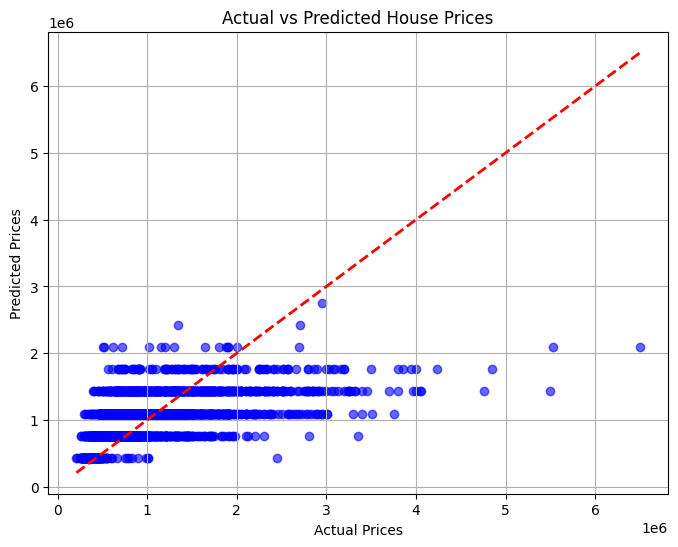

In [ ]:
#Let's visualize the predictions!

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # ideal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

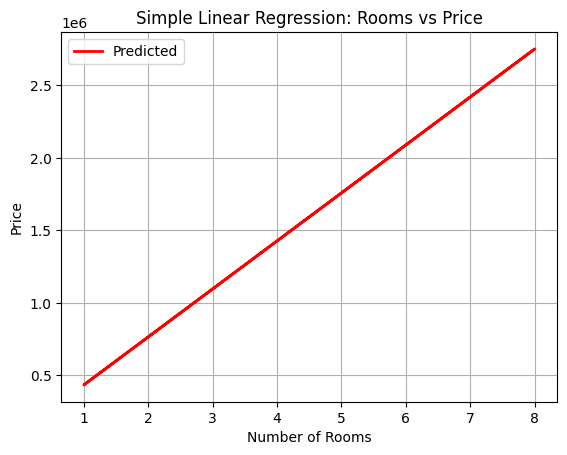

In [ ]:
# Line plot of predicted data
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')

plt.xlabel("Number of Rooms")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Rooms vs Price")
plt.legend()
plt.grid(True)
plt.show()

##Multiple Linear Regression

You may have noticed that our model wasn't very good; there was a big difference between predicted prices and actual prices. This may be because there are so many factors that affect housing prices, so we couldn't only use the number of rooms to predict the price.

In cases like these, we can instead use multiple linear regression. In this case, the model is trained using several features, and returns one label as a result.

In [ ]:
df = df.dropna() #This time, since I want to use a feature with na values, I will drop/remove them
#Not that often, this is not the best way to deal with na values

features = ["Rooms", "Bathroom", "Landsize", "BuildingArea", "YearBuilt"]
X = df[features]
y = df["Price"]

In [ ]:
#Next, I'm splitting the data into training and testing data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Here, we are training the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Let's see if the model actually works!
y_pred = model.predict(X_test)

y_pred

new_df = pd.DataFrame({
    "Rooms": X_test["Rooms"].values,
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})

new_df.head()

,Rooms,Actual Price,Predicted Price
0,2,660000.0,6.687634e+05
1,3,800000.0,1.136988e+06
2,2,525000.0,7.051053e+05
3,2,790000.0,6.859450e+05
4,4,1200000.0,1.742195e+06


Evidently, our model has improved! I wonder if there are ways to evaluate how well the model performs...